In [1]:
# Load all the librarires
# for data manipulation and visualization 
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

pd.options.display.max_columns=None
plt.rcParams["figure.figsize"] = (15,8)
plt.style.use('fivethirtyeight')

import time
from scipy import stats
import statsmodels.api as sm

# preprocessing modules
from sklearn.preprocessing import StandardScaler, PowerTransformer, OrdinalEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from imblearn.over_sampling import SMOTE

# modelling modules
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier,GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC

# modules for model evaluation
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score, f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import plot_precision_recall_curve
from sklearn.metrics import precision_score,recall_score

#Feature selection
from sklearn.feature_selection import RFE

print("All Libraries are imported")


All Libraries are imported


In [2]:
df=pd.read_csv('train_LZdllcl.csv')

In [3]:
df.shape

(54808, 14)

In [4]:
df.columns

Index(['employee_id', 'department', 'region', 'education', 'gender',
       'recruitment_channel', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'KPIs_met >80%', 'awards_won?',
       'avg_training_score', 'is_promoted'],
      dtype='object')

In [5]:
df.drop('employee_id',axis=1,inplace=True)

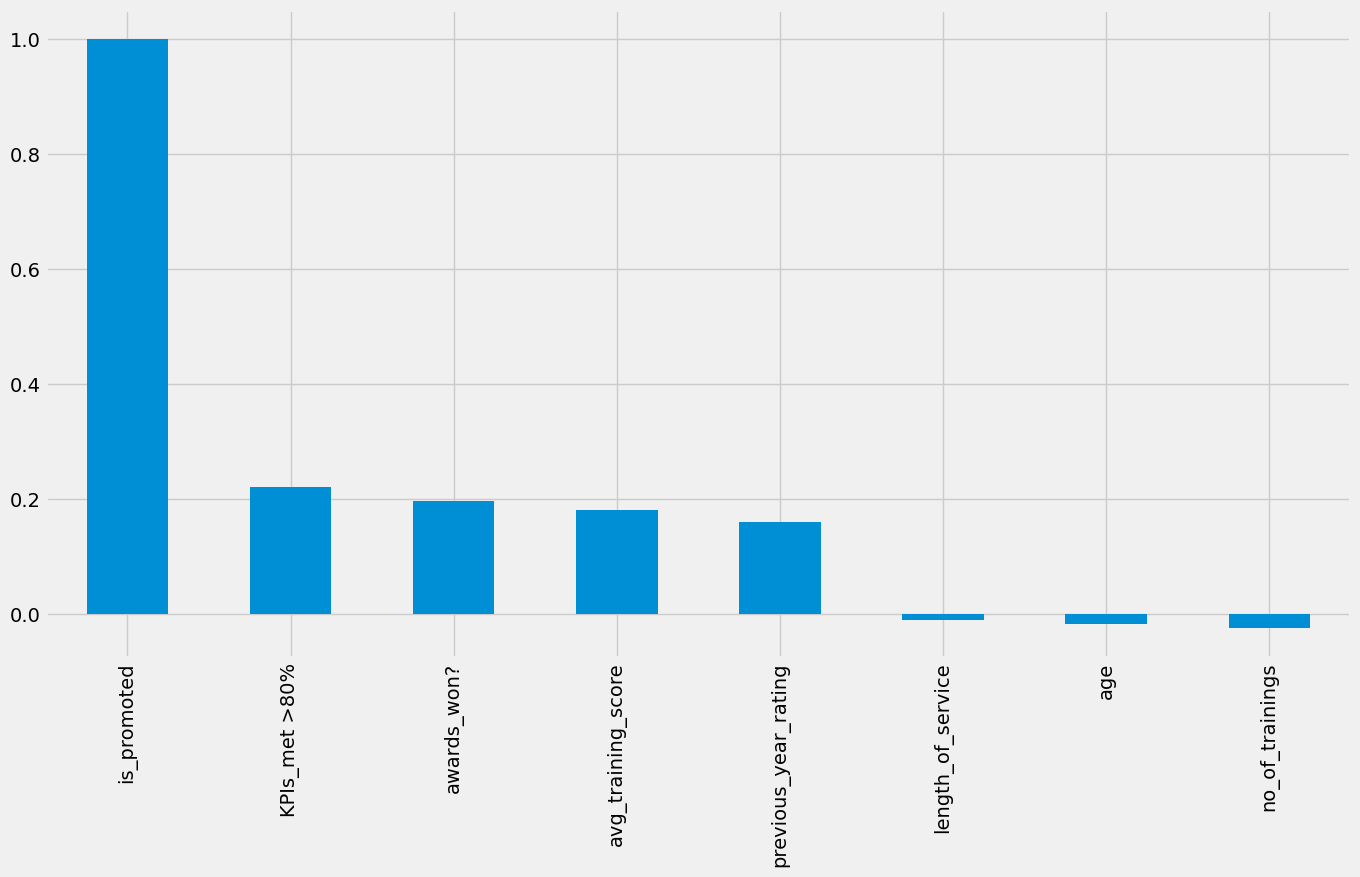

In [6]:
df.corr()['is_promoted'].sort_values(ascending = False).plot(kind='bar')
plt.show()

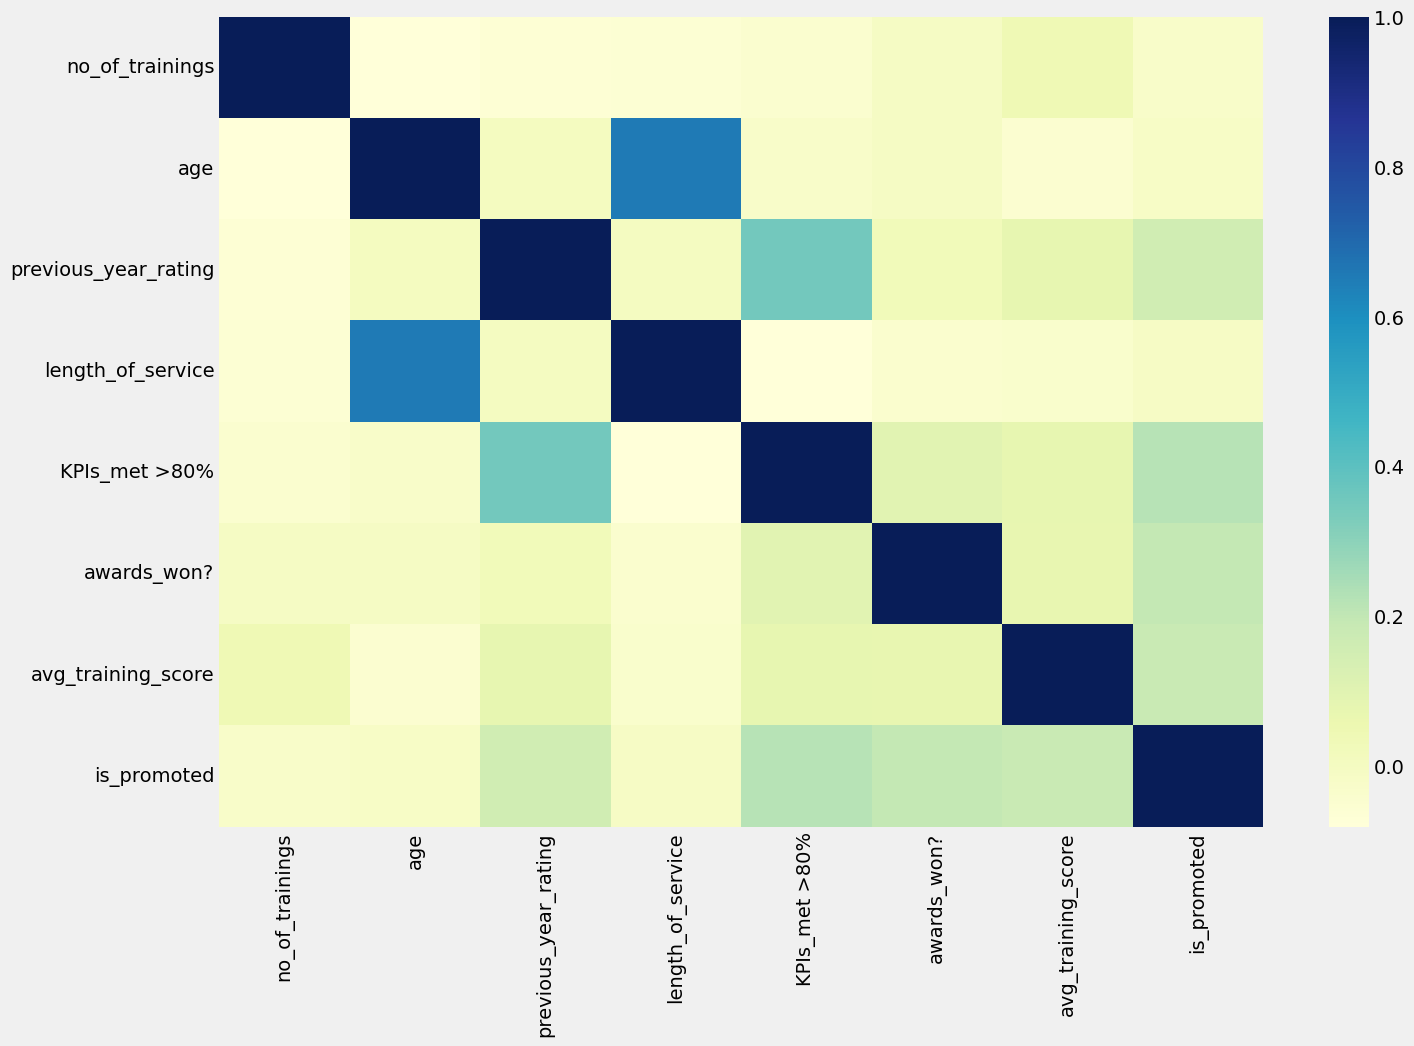

In [7]:
corr=df.corr().iloc[:,:] 
c1 = corr.abs().unstack()
c1.sort_values(ascending = False)

plt.subplots(figsize=(15,10))
sns.heatmap(corr,annot=False,cmap="YlGnBu")
plt.show()

In [8]:
df.isna().sum()/len(df)*100

department              0.000000
region                  0.000000
education               4.395344
gender                  0.000000
recruitment_channel     0.000000
no_of_trainings         0.000000
age                     0.000000
previous_year_rating    7.524449
length_of_service       0.000000
KPIs_met >80%           0.000000
awards_won?             0.000000
avg_training_score      0.000000
is_promoted             0.000000
dtype: float64

In [9]:
for i in df.department.unique():
    for j in df.recruitment_channel.unique():
        mode_value = df[(df.department == i) & (df.recruitment_channel == j)].education.mode()[0]
        df.loc[(df.department == i) & (df.recruitment_channel == j), 'education'] = df[(df.department == i) & (df.recruitment_channel == j)].education.replace(np.nan, mode_value)


In [10]:

for i in df.department.unique():
    for j in df.education.unique():
        mode_values = df[(df.department == i) & (df.education == j)].previous_year_rating.mode()
        if not mode_values.empty:
            mode_value = mode_values[0]
            df.loc[(df.department == i) & (df.education == j), 'previous_year_rating'] = df[(df.department == i) & (df.education == j)].previous_year_rating.replace(np.nan, mode_value)


In [11]:
df.isna().sum()/len(df)*100

department              0.0
region                  0.0
education               0.0
gender                  0.0
recruitment_channel     0.0
no_of_trainings         0.0
age                     0.0
previous_year_rating    0.0
length_of_service       0.0
KPIs_met >80%           0.0
awards_won?             0.0
avg_training_score      0.0
is_promoted             0.0
dtype: float64

In [12]:
# Binning the column age 

bins = [19, 30, 40, 50, 61]
labels = ['20-29', '30-39', '40-49', '50-59']
df.age=pd.cut(df.age, bins=bins, labels=labels)

**bin the age column into five intervals: 20-29, 30-39, 40-49, 50-59**

In [13]:
df.age.unique()

['30-39', '20-29', '40-49', '50-59']
Categories (4, object): ['20-29' < '30-39' < '40-49' < '50-59']

In [14]:
df.age.value_counts()

30-39    26028
20-29    18118
40-49     7810
50-59     2852
Name: age, dtype: int64

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   department            54808 non-null  object  
 1   region                54808 non-null  object  
 2   education             54808 non-null  object  
 3   gender                54808 non-null  object  
 4   recruitment_channel   54808 non-null  object  
 5   no_of_trainings       54808 non-null  int64   
 6   age                   54808 non-null  category
 7   previous_year_rating  54808 non-null  float64 
 8   length_of_service     54808 non-null  int64   
 9   KPIs_met >80%         54808 non-null  int64   
 10  awards_won?           54808 non-null  int64   
 11  avg_training_score    54808 non-null  int64   
 12  is_promoted           54808 non-null  int64   
dtypes: category(1), float64(1), int64(6), object(5)
memory usage: 5.1+ MB


### Mean encoding is a technique used to encode categorical variables with numerical values based on the mean of the target variable for each category

In [16]:
df[['KPIs_met >80%','awards_won?','is_promoted','no_of_trainings']]=df[['KPIs_met >80%','awards_won?','is_promoted','no_of_trainings']].astype('object')


In [17]:
num=df.select_dtypes(include=np.number).columns
cat=df.select_dtypes(exclude=np.number).columns


In [18]:
for i in cat:
    print(i,'\n',df[i].unique(),'\n\n')

department 
 ['Sales & Marketing' 'Operations' 'Technology' 'Analytics' 'R&D'
 'Procurement' 'Finance' 'HR' 'Legal'] 


region 
 ['region_7' 'region_22' 'region_19' 'region_23' 'region_26' 'region_2'
 'region_20' 'region_34' 'region_1' 'region_4' 'region_29' 'region_31'
 'region_15' 'region_14' 'region_11' 'region_5' 'region_28' 'region_17'
 'region_13' 'region_16' 'region_25' 'region_10' 'region_27' 'region_30'
 'region_12' 'region_21' 'region_8' 'region_32' 'region_6' 'region_33'
 'region_24' 'region_3' 'region_9' 'region_18'] 


education 
 ["Master's & above" "Bachelor's" 'Below Secondary'] 


gender 
 ['f' 'm'] 


recruitment_channel 
 ['sourcing' 'other' 'referred'] 


no_of_trainings 
 [1 2 3 4 7 5 6 8 10 9] 


age 
 ['30-39', '20-29', '40-49', '50-59']
Categories (4, object): ['20-29' < '30-39' < '40-49' < '50-59'] 


KPIs_met >80% 
 [1 0] 


awards_won? 
 [0 1] 


is_promoted 
 [0 1] 




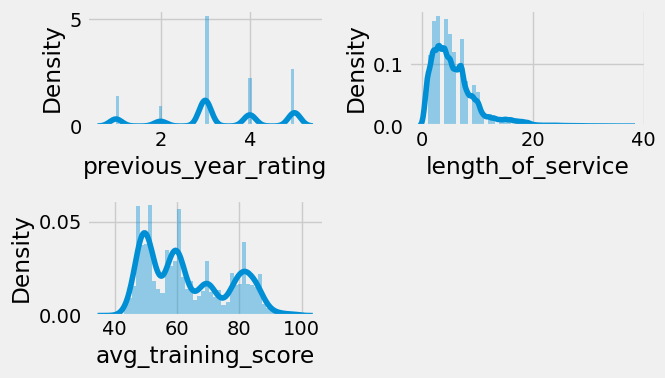

In [19]:
# Analysis for each numerical column
r=2
c=2
it=1
plt.figure(figsize=(7,4))
for i in df[num].columns:
    plt.subplot(r,c,it)
    sns.distplot(df[i])
    plt.xlabel(i)
    it+=1
plt.tight_layout()
plt.show()

In [24]:
cat1=['department','education','gender','recruitment_channel','no_of_trainings','age','KPIs_met >80%','awards_won?']

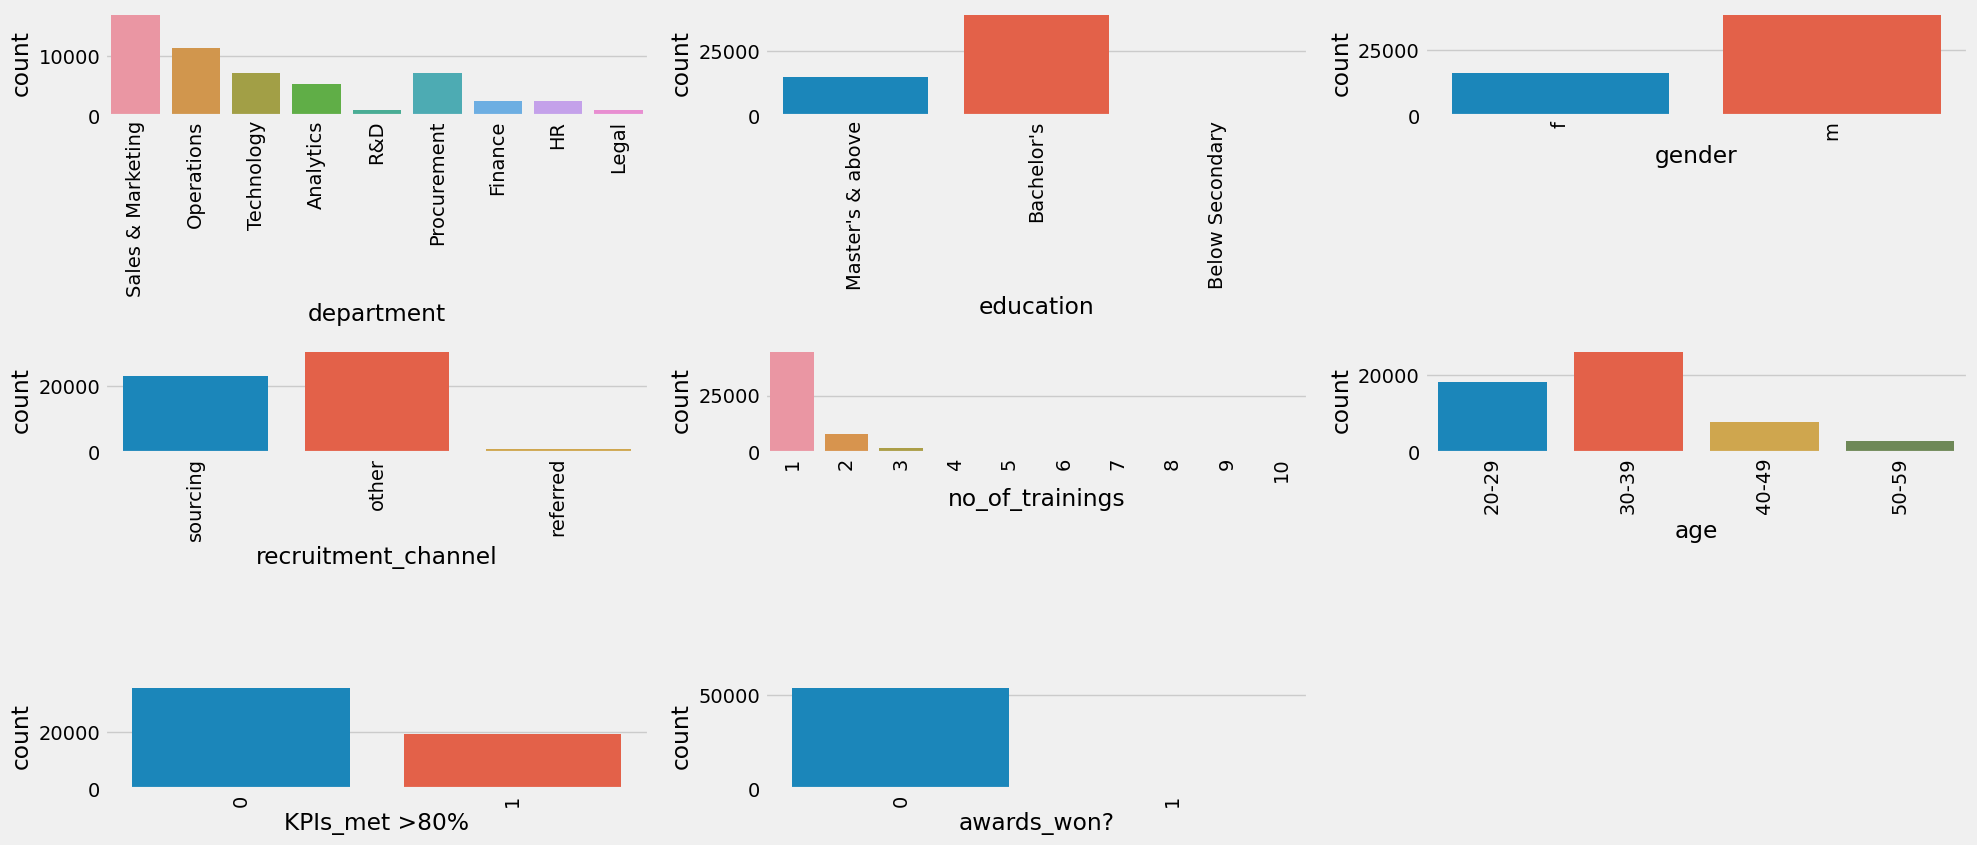

In [26]:
# Analysis of each categorical column 
r=5
c=3
it=1
plt.figure(figsize=(20,15))
for i in cat1:
    plt.subplot(r,c,it)
    sns.countplot(df[i])
    plt.xticks(rotation=90)
    it+=1
plt.tight_layout()
plt.show()

In [27]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
previous_year_rating,54808.0,3.305393,1.215292,1.0,3.0,3.0,4.0,5.0
length_of_service,54808.0,5.865512,4.265094,1.0,3.0,5.0,7.0,37.0
avg_training_score,54808.0,63.386750,13.371559,39.0,51.0,60.0,76.0,99.0


In [28]:
df[cat].describe().T

,count,unique,top,freq
department,54808,9,Sales & Marketing,16840
region,54808,34,region_2,12343
education,54808,3,Bachelor's,39078
gender,54808,2,m,38496
recruitment_channel,54808,3,other,30446
no_of_trainings,54808,10,1,44378
age,54808,4,30-39,26028
KPIs_met >80%,54808,2,0,35517
awards_won?,54808,2,0,53538
is_promoted,54808,2,0,50140


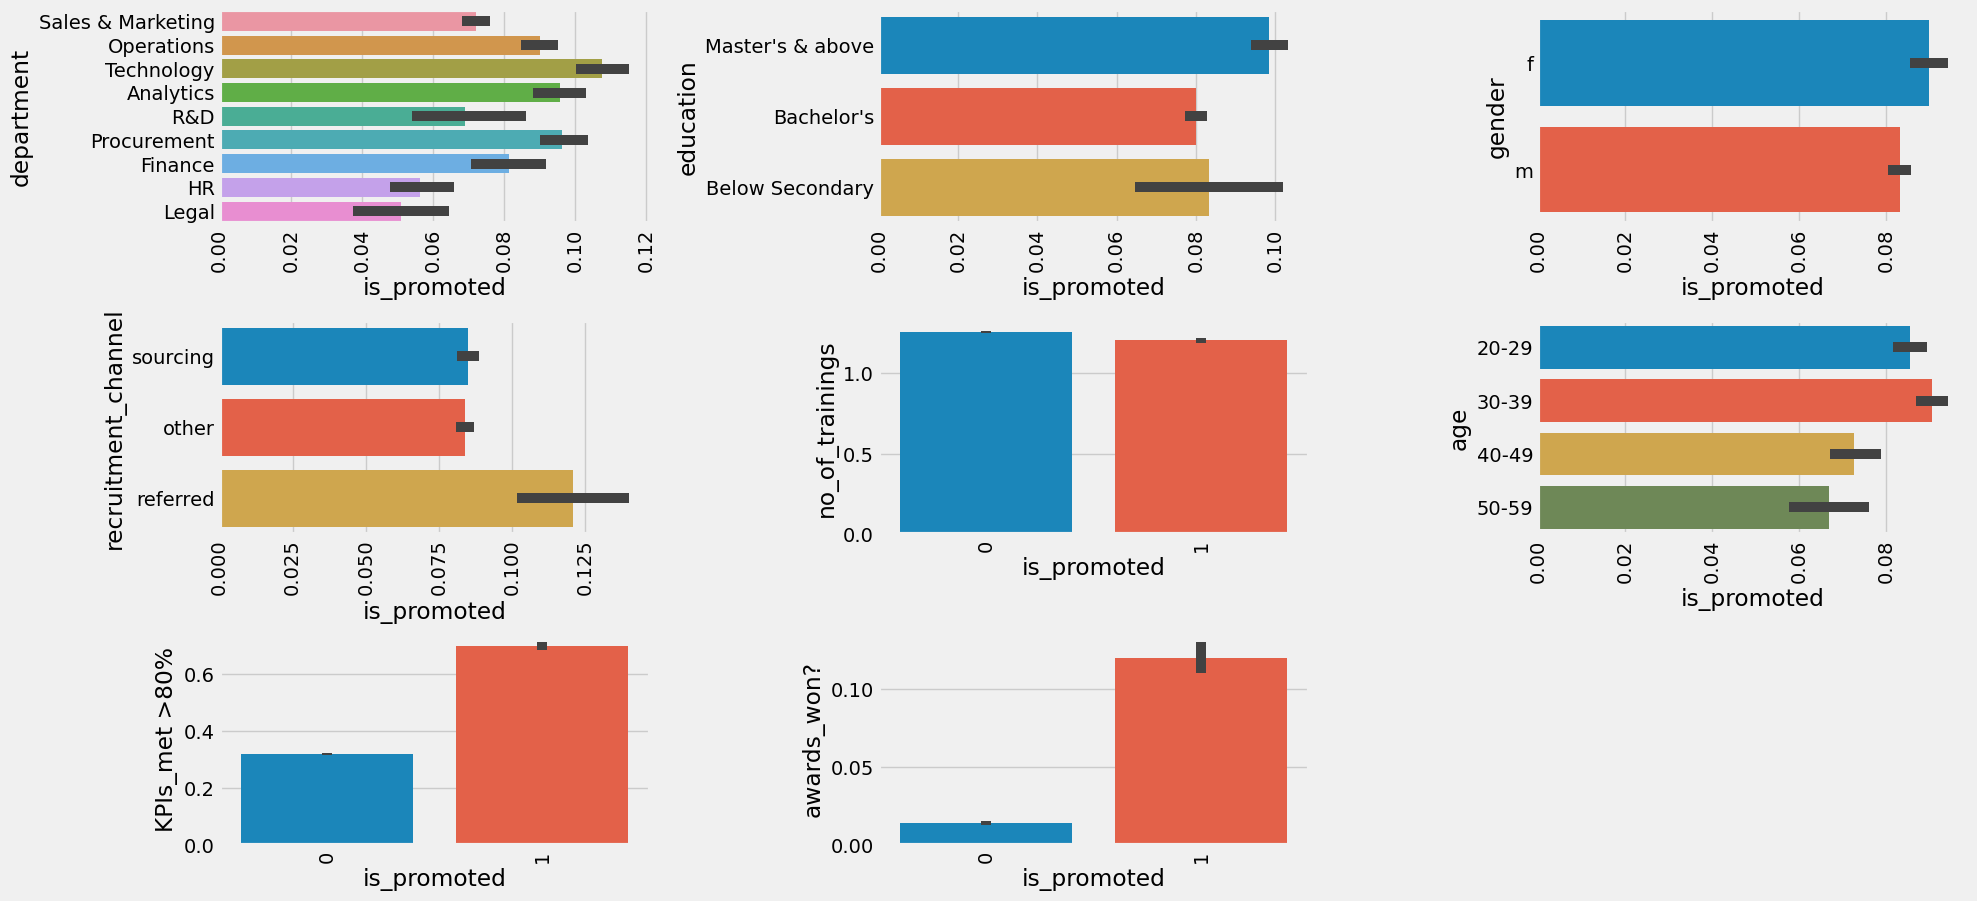

In [29]:
# Analysis of each categorical column with the target
r=5
c=3
it=1
plt.figure(figsize=(20,15))
for i in cat1:
    plt.subplot(r,c,it)
    sns.barplot(y=df[i],x=df['is_promoted'])
    plt.xticks(rotation=90)
    it+=1
plt.tight_layout()
plt.show()

In [30]:
df.no_of_trainings.unique()

array([1, 2, 3, 4, 7, 5, 6, 8, 10, 9], dtype=object)

In [31]:
df['tot_training_score']=df['no_of_trainings']*df['avg_training_score']
df['tot_training_score']=df['tot_training_score'].astype('int64')

In [32]:
df.drop(columns=['no_of_trainings','avg_training_score'],axis=1,inplace=True)

In [33]:
num=df.select_dtypes(include=np.number).columns
cat=df.select_dtypes(exclude=np.number).columns

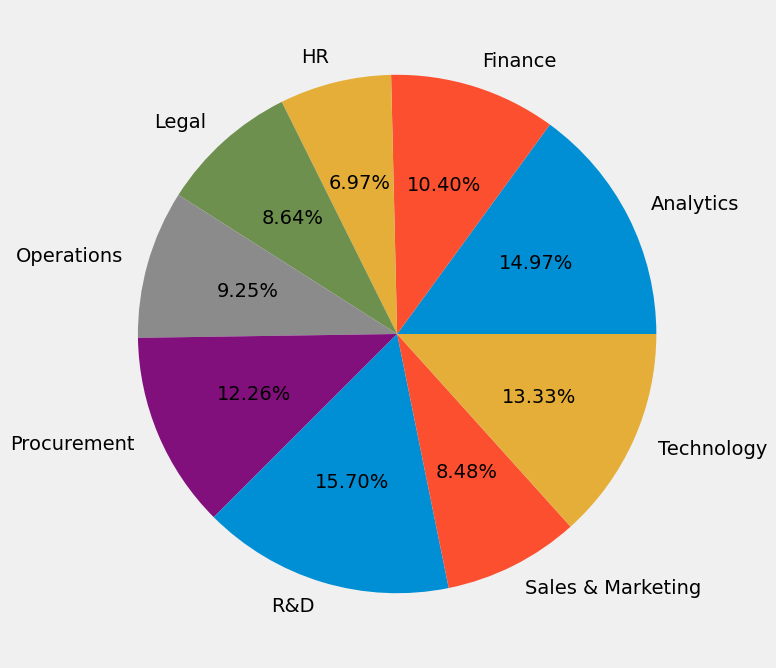

In [34]:
s=df.groupby(by='department')['tot_training_score'].mean()
plt.pie(s.values, labels = s.index,autopct='%.2f%%')
plt.show()

In [35]:
df[num].skew()

previous_year_rating   -0.261528
length_of_service       1.738061
tot_training_score      3.069118
dtype: float64

In [36]:
df.education.unique()

array(["Master's & above", "Bachelor's", 'Below Secondary'], dtype=object)

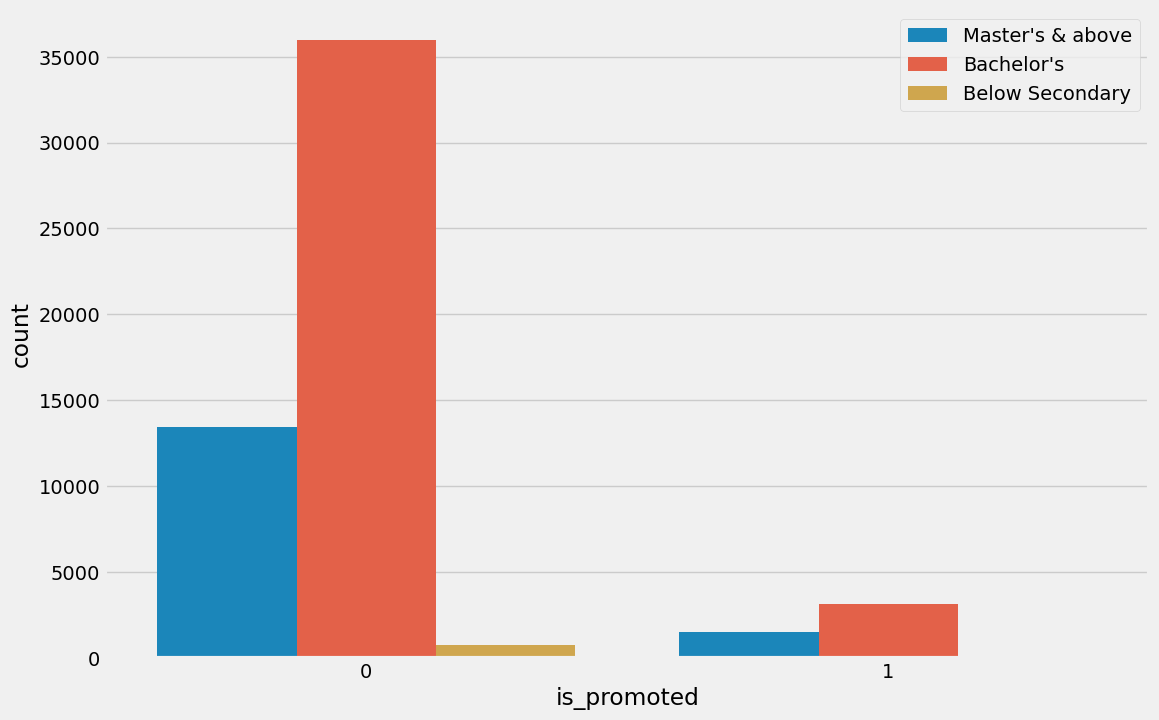

is_promoted,0,1
education,,
Below Secondary,0.916770,0.083230
Bachelor's,0.919904,0.080096
Master's & above,0.901441,0.098559


In [37]:
plt.figure(figsize=(12, 8))
sns.countplot(x='is_promoted', hue='education', data=df)
plt.legend(loc='best')
plt.show()
pd.crosstab(df.education, 
            df.is_promoted, 
            normalize='index').reindex(index=['Below Secondary', "Bachelor's", "Master's & above"])

In [38]:
p=PowerTransformer()
df[['length_of_service','tot_training_score']]=p.fit_transform(df[['length_of_service','tot_training_score']])

In [39]:
df[num].skew()

previous_year_rating   -0.261528
length_of_service       0.003095
tot_training_score      0.202568
dtype: float64

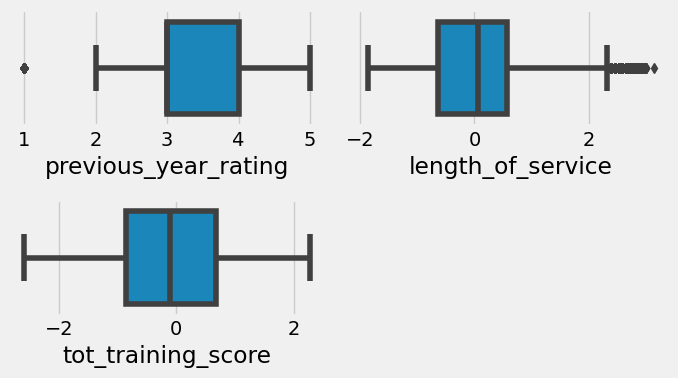

In [40]:
r=2
c=2
it=1
plt.figure(figsize=(7,4))
for i in df[num].columns:
    plt.subplot(r,c,it)
    sns.boxplot(df[i])
    plt.xlabel(i)
    it+=1
plt.tight_layout()
plt.show()

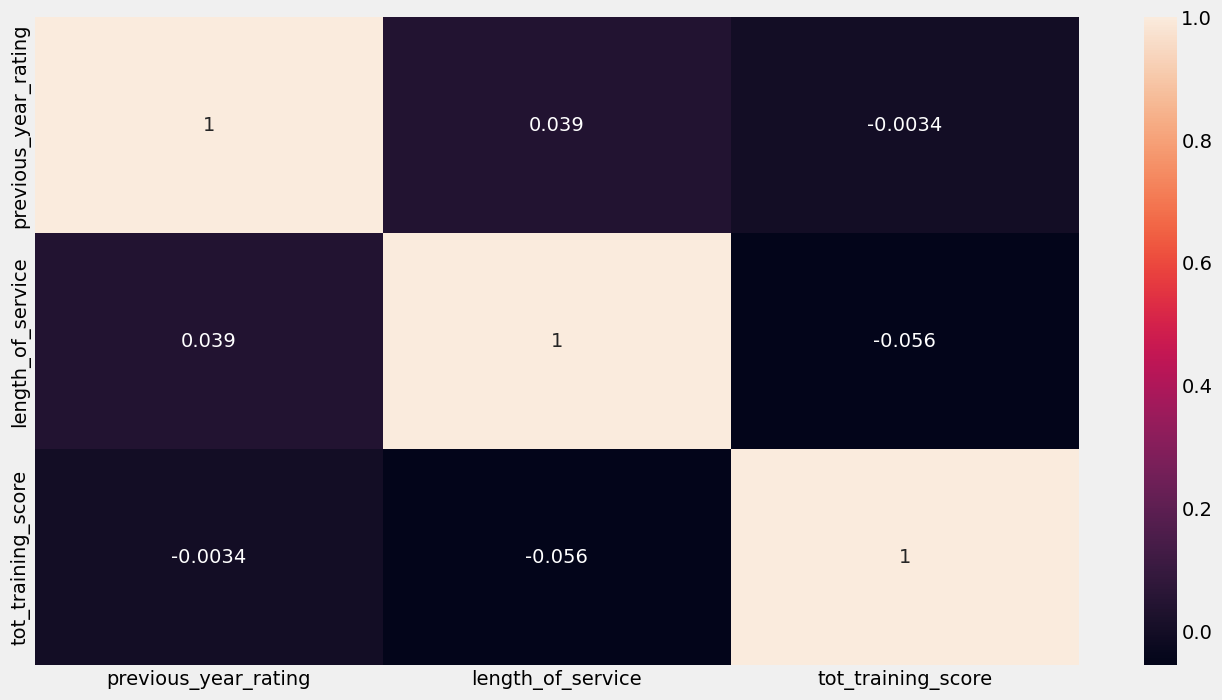

In [41]:
sns.heatmap(df.corr(),annot=True)
plt.show()

# STATISTICAL TESTS

#### Statistical Test to Determine a significant Relationship between independent variable and target:
* A Chisquare contingency test of independence is to be done with categorical columns the target, as our target is a categorical column.
* A 2 sample unpaired t test of independence is to be done with numerical columns against the target, as our target is a categorical column.
* Null Hypothesis : There is NO statistically significant relationship.
* Alternate Hypothesis : There is a statistically significant relationship.

In [42]:
for i in cat:
    if i not in ['is_promoted']:
        ct = pd.crosstab(df['is_promoted'], df[i])
        print('p_value for',i,':',round(stats.chi2_contingency(observed = ct)[1],2))

p_value for department : 0.0
p_value for region : 0.0
p_value for education : 0.0
p_value for gender : 0.01
p_value for recruitment_channel : 0.0
p_value for age : 0.0
p_value for KPIs_met >80% : 0.0
p_value for awards_won? : 0.0


In [43]:
for i in num:
    a = df[df['is_promoted'] == 0][i]
    b = df[df['is_promoted'] == 1][i]
    print('p_value for',i,':',round(stats.ttest_ind(a,b)[1],2))

p_value for previous_year_rating : 0.0
p_value for length_of_service : 0.12
p_value for tot_training_score : 0.0


**All columns with p_value < 0.05 are significant, except the column length_of_service. Its not significant**

In [44]:
encoder = OrdinalEncoder(categories=[['Below Secondary', "Bachelor's", "Master's & above"]],dtype='int64')

df.education = encoder.fit_transform([[label] for label in df.education])

df.education

0        2
1        1
2        1
3        1
4        1
        ..
54803    1
54804    2
54805    1
54806    1
54807    1
Name: education, Length: 54808, dtype: int64

In [45]:
df.age.unique()

['30-39', '20-29', '40-49', '50-59']
Categories (4, object): ['20-29' < '30-39' < '40-49' < '50-59']

In [46]:
encoder = OrdinalEncoder(categories=[[ '20-29', '30-39', '40-49', '50-59']],dtype='int64')

df.age = encoder.fit_transform([[label] for label in df.age])

df.age

0        1
1        0
2        1
3        1
4        2
        ..
54803    2
54804    1
54805    0
54806    0
54807    0
Name: age, Length: 54808, dtype: int64

In [47]:
df.dtypes

department               object
region                   object
education                 int64
gender                   object
recruitment_channel      object
age                       int64
previous_year_rating    float64
length_of_service       float64
KPIs_met >80%            object
awards_won?              object
is_promoted              object
tot_training_score      float64
dtype: object

In [48]:
df.gender.replace(['m','f'],[1,0],inplace=True)

In [49]:
df=pd.get_dummies(data=df,columns=['department','region',
                                   'recruitment_channel'])

In [50]:
df.is_promoted=df.is_promoted.astype('int64')

# SAMPLING

In [51]:
df.is_promoted.value_counts()

0    50140
1     4668
Name: is_promoted, dtype: int64

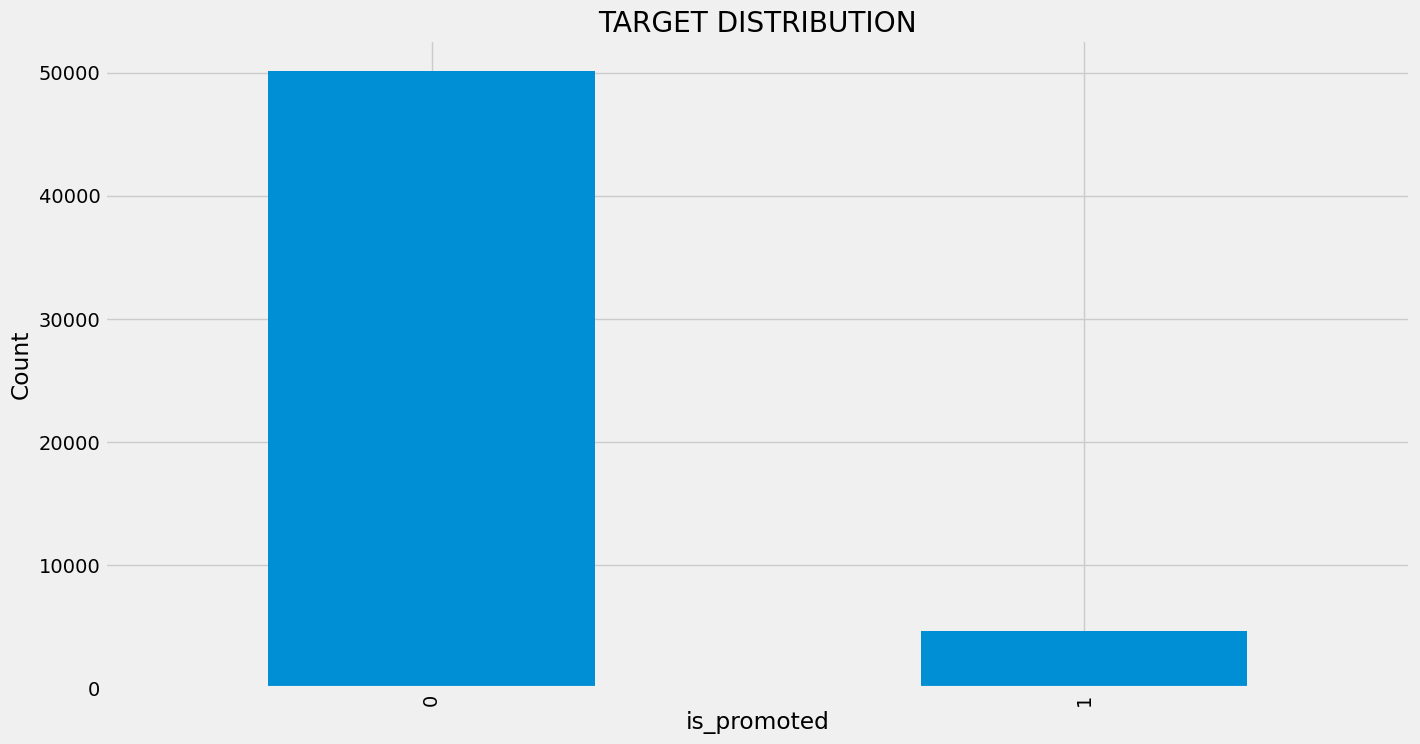

In [52]:
df.is_promoted.value_counts().plot(kind='bar')
plt.title('TARGET DISTRIBUTION')
plt.xlabel('is_promoted')
plt.ylabel('Count')
plt.show()

In [53]:
d0=df[df.is_promoted==0]
d1=df[df.is_promoted!=0]
df_0=d0.sample(n=5000, random_state=42)
df_sample_under=pd.concat([df_0,d1],axis=0)

In [54]:
df_sample_under.shape

(9668, 55)

In [55]:
df_sample_under[['KPIs_met >80%','awards_won?']]=df_sample_under[['KPIs_met >80%','awards_won?']].astype('int64')


In [56]:
x=df_sample_under.drop(columns='is_promoted')
y=df_sample_under['is_promoted']

In [57]:
x.dtypes

education                         int64
gender                            int64
age                               int64
previous_year_rating            float64
length_of_service               float64
KPIs_met >80%                     int64
awards_won?                       int64
tot_training_score              float64
department_Analytics              uint8
department_Finance                uint8
department_HR                     uint8
department_Legal                  uint8
department_Operations             uint8
department_Procurement            uint8
department_R&D                    uint8
department_Sales & Marketing      uint8
department_Technology             uint8
region_region_1                   uint8
region_region_10                  uint8
region_region_11                  uint8
region_region_12                  uint8
region_region_13                  uint8
region_region_14                  uint8
region_region_15                  uint8
region_region_16                  uint8


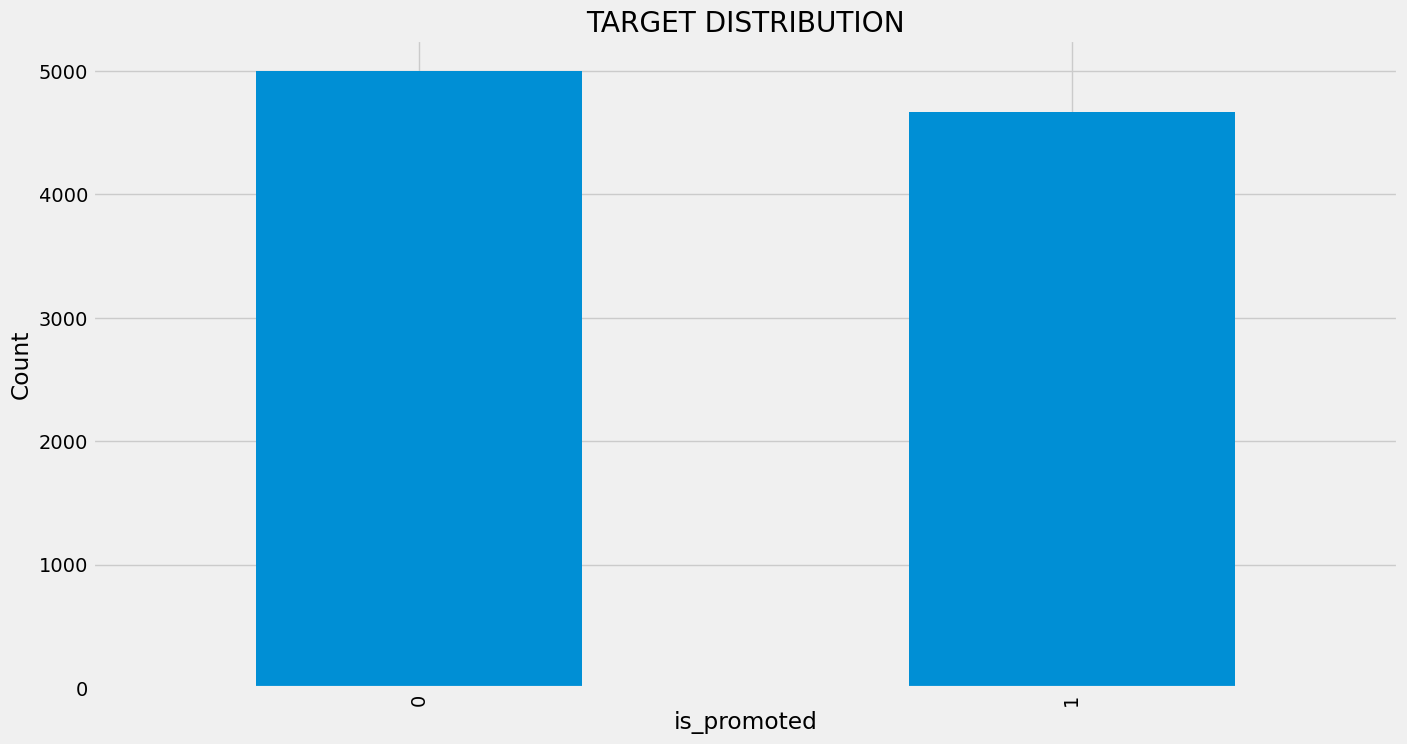

In [58]:
df_sample_under.is_promoted.value_counts().plot(kind='bar')
plt.title('TARGET DISTRIBUTION')
plt.xlabel('is_promoted')
plt.ylabel('Count')
plt.show()

# Dataset and preprocessing
Before fitting the models,The following excercises are performed.Data wrangling, preprocessing, exploration and visualization. The dataset used in this project is the human resource analytics data from a live hackathon on Analytics vidhya:https://datahack.analyticsvidhya.com/contest/wns-analytics-hackathon-2018-1/. It comprises 54,808 observations and 14 variables. There were missing values which were treated. The target variable is 'is_promoted, with 1 indicating Promoted and 0 non-promoted. Irrelevant variables(employee Id) was dropped, features were standardised to the same scale ,categorical variables are converted using the Ordinal Encoding and dummy encoding and also,examined the correlation between the features. there is no high correlation between them. 

In [59]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.25,random_state=12)

In [60]:
xtrain.shape,xtest.shape,ytrain.shape,ytest.shape

((7251, 54), (2417, 54), (7251,), (2417,))

In [61]:
xtrain_sc=xtrain.copy()
xtest_sc=xtest.copy()

In [62]:
s=StandardScaler()
xtrain_sc[['previous_year_rating', 
           'length_of_service', 
           'tot_training_score']]=s.fit_transform(xtrain[['previous_year_rating', 
                                                          'length_of_service', 
                                                          'tot_training_score']])
xtest_sc[['previous_year_rating', 
          'length_of_service', 
          'tot_training_score']]=s.transform(xtest[['previous_year_rating', 
                                                    'length_of_service', 
                                                    'tot_training_score']])


In [63]:
LGB_model=LogisticRegression(random_state=42)
LGB_model.fit(xtrain,ytrain)
ypred=LGB_model.predict(xtest)
print('confusion_matrix:\n',confusion_matrix(ytest,ypred))
print('\nclassification_report:\n',classification_report(ytest,ypred))
print('Train score: ',LGB_model.score(xtrain,ytrain))
print('Test score: ',LGB_model.score(xtest,ytest))

confusion_matrix:
 [[901 356]
 [326 834]]

classification_report:
               precision    recall  f1-score   support

           0       0.73      0.72      0.73      1257
           1       0.70      0.72      0.71      1160

    accuracy                           0.72      2417
   macro avg       0.72      0.72      0.72      2417
weighted avg       0.72      0.72      0.72      2417

Train score:  0.7259688318852572
Test score:  0.717832023169218


# FEATURE ELIMINATION

In [64]:
x=df_sample_under.drop(columns='is_promoted')
y=df_sample_under.is_promoted
lr=LogisticRegression()
rfe=RFE(estimator=lr,n_features_to_select=10)
rfe_model=rfe.fit(x,y)
rfe_model.ranking_

array([28, 34, 29, 12, 44,  1,  1, 10, 14, 21, 33,  1, 35, 38,  9, 11, 36,
       20, 17,  5,  3, 25, 27, 30, 41,  7, 39,  1, 26,  4,  1, 19, 23,  1,
        8, 45, 40, 15,  1, 18, 24,  2, 37, 42,  1,  6,  1, 13, 16, 22,  1,
       31, 43, 32])

In [65]:
ranking=pd.DataFrame(rfe_model.ranking_,columns=['Rank'],index=x.columns)

In [66]:
ranking[ranking['Rank']==1]

,Rank
KPIs_met >80%,1
awards_won?,1
department_Legal,1
region_region_19,1
region_region_21,1
region_region_24,1
region_region_29,1
region_region_34,1
region_region_5,1
region_region_9,1


In [67]:
# x=df_sample_under[list(ranking[ranking['Rank']==1].index)]
# y=df_sample_under.is_promoted
# xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=13)

In [68]:
# LGB_model=LogisticRegression(random_state=42)
# LGB_model.fit(xtrain,ytrain)
# ypred=LGB_model.predict(xtest)
# print('confusion_matrix\n',confusion_matrix(ytest,ypred))
# print('classification_report\n',classification_report(ytest,ypred))
# print('Train score: ',LGB_model.score(xtrain,ytrain))
# print('Test score: ',LGB_model.score(xtest,ytest))

In [69]:
# XGB_model=XGBClassifier(random_state=100)
# XGB_model.fit(xtrain,ytrain)
# ypred=XGB_model.predict(xtest)
# print('confusion_matrix\n',confusion_matrix(ytest,ypred))
# print('classification_report\n',classification_report(ytest,ypred))
# print('Train score: ',XGB_model.score(xtrain,ytrain))
# print('Test score: ',XGB_model.score(xtest,ytest))


In [70]:
# function to print metrics
def print_metrics(ytest,ypred,model):
    print('Metrics for the model',model)
    print(' ')
    print("Accuracy score is ",accuracy_score(ytest,ypred))
    print(' ')
    print("recall score is ",recall_score(ytest,ypred))
    print(' ')
    print('precision score is',precision_score(ytest,ypred))
    print(' ')
    print('f1 score is', f1_score(ytest,ypred))
    print(' ')
    print(' Roc score is ',roc_auc_score(ytest,ypred))
    print(' ')
    print('Confusion matrix \n', confusion_matrix(ytest,ypred))
    print(' ')
    print('Classification report \n',classification_report(ytest,ypred))

In [71]:
#lets select the best model based on f1 score and optimize it

clfs={
    'KNN': KNeighborsClassifier(),
    'NaiveBayes':GaussianNB(),
    'Logregs':LogisticRegression(),
    'DecisionTree':DecisionTreeClassifier(),
    'RandomForest':RandomForestClassifier(),
    'AdaBoost':AdaBoostClassifier(),
    'GradientBoosting':GradientBoostingClassifier(),
    'XGBoost':XGBClassifier()
}
models_report=pd.DataFrame(columns=['Model','accuracy','F1_score','Train score','Test score','Time_taken'])

for clf,clf_name in list(zip(clfs.values(),clfs.keys())):
    start_time = time.time()
    clf.fit(xtrain,ytrain)
    end_time = time.time()
    ypred=clf.predict(xtest)
    print('Fitting the model.....', clf_name)
    t={
        'Model':clf_name,
        'accuracy':accuracy_score(ytest,ypred),
        'F1_score':f1_score(ytest,ypred),
        'Train score':clf.score(xtrain,ytrain),
        'Test score':clf.score(xtest,ytest),
        'Precision score':precision_score(ytest,ypred),
        'Recall score':recall_score(ytest,ypred),
        'Time_taken':end_time - start_time
    }
    
    models_report=models_report.append(t,ignore_index=True)
models_report











Fitting the model..... KNN
Fitting the model..... NaiveBayes
Fitting the model..... Logregs
Fitting the model..... DecisionTree
Fitting the model..... RandomForest
Fitting the model..... AdaBoost
Fitting the model..... GradientBoosting
Fitting the model..... XGBoost


,Model,accuracy,F1_score,Train score,Test score,Time_taken,Precision score,Recall score
0,KNN,0.717005,0.709431,0.807337,0.717005,0.008543,0.699330,0.719828
1,NaiveBayes,0.594125,0.658545,0.604055,0.594125,0.013590,0.552248,0.815517
2,Logregs,0.717832,0.709787,0.725969,0.717832,0.175965,0.700840,0.718966
3,DecisionTree,0.747207,0.734463,0.998897,0.747207,0.067833,0.740578,0.728448
4,RandomForest,0.776996,0.779910,0.998897,0.776996,1.124863,0.740884,0.823276
5,AdaBoost,0.729830,0.712208,0.736726,0.729830,0.517004,0.728584,0.696552
6,GradientBoosting,0.780306,0.792497,0.806096,0.780306,1.287382,0.724803,0.874138
7,XGBoost,0.796856,0.798192,0.908151,0.796856,1.606647,0.762765,0.837069


In [72]:
GB_model=GradientBoostingClassifier(random_state=100)
GB_model.fit(xtrain,ytrain)
ypred=GB_model.predict(xtest)
print('accuracy:',accuracy_score(ytest,ypred))
print('f1_score:',f1_score(ytest,ypred))
print('Train score',GB_model.score(xtrain,ytrain))
print('Test score',GB_model.score(xtest,ytest))
print('Precision score',precision_score(ytest,ypred))
print('Recall score',recall_score(ytest,ypred))

accuracy: 0.7803061646669425
f1_score: 0.7924970691676437
Train score 0.8060957109364225
Test score 0.7803061646669425
Precision score 0.7248034310221587
Recall score 0.8741379310344828


In [73]:
info=pd.DataFrame(GB_model.feature_importances_,columns=['Information_Gain'],index=xtrain.columns)
info

,Information_Gain
education,0.001758
gender,0.002067
age,0.002033
previous_year_rating,0.151924
length_of_service,0.011071
KPIs_met >80%,0.350729
awards_won?,0.081152
tot_training_score,0.263315
department_Analytics,0.005314
department_Finance,0.001707


In [74]:
list(info[info['Information_Gain']>0.005].index)

['previous_year_rating',
 'length_of_service',
 'KPIs_met >80%',
 'awards_won?',
 'tot_training_score',
 'department_Analytics',
 'department_Operations',
 'department_Procurement',
 'department_Sales & Marketing',
 'department_Technology']

In [75]:
GB_model=GradientBoostingClassifier()
GB_model.fit(xtrain[list(info[info['Information_Gain']>0.005].index)],ytrain)
ypred=GB_model.predict(xtest[list(info[info['Information_Gain']>0.005].index)])
print('accuracy:',accuracy_score(ytest,ypred))
print('f1_score:',f1_score(ytest,ypred))
print('Train score',GB_model.score(xtrain[list(info[info['Information_Gain']>0.005].index)],ytrain))
print('Test score',GB_model.score(xtest[list(info[info['Information_Gain']>0.005].index)],ytest))
print('Precision score',precision_score(ytest,ypred))
print('Recall score',recall_score(ytest,ypred))

accuracy: 0.7840297889946214
f1_score: 0.7992307692307692
Train score 0.8011308784995174
Test score 0.7840297889946214
Precision score 0.7215277777777778
Recall score 0.8956896551724138


# HYPER PARAMETER TUNING -GradientBoosting

In [76]:
params = {'learning_rate':[0.5,0.6,0.7],
          'n_estimators':[100,150,160],
         'min_samples_split':[2,3,5],
         'max_depth':[3,5,7]}

In [77]:
grid = GridSearchCV(estimator = GB_model, param_grid=params,cv=5,scoring='f1')
grid.fit(xtrain,ytrain)
grid.best_params_

{'learning_rate': 0.6,
 'max_depth': 3,
 'min_samples_split': 3,
 'n_estimators': 100}

In [78]:
GB_model=GradientBoostingClassifier(learning_rate= 0.6,max_depth= 3,min_samples_split= 3,n_estimators= 100)
GB_model.fit(xtrain,ytrain)
ypred=GB_model.predict(xtest)
print('accuracy:',accuracy_score(ytest,ypred))
print('f1_score:',f1_score(ytest,ypred))
print('Train score',GB_model.score(xtrain,ytrain))
print('Test score',GB_model.score(xtest,ytest))
print('Precision score',precision_score(ytest,ypred))
print('Recall score',recall_score(ytest,ypred))

accuracy: 0.8026479106330161
f1_score: 0.805067429505517
Train score 0.8682940284098745
Test score 0.8026479106330161
Precision score 0.7653457653457654
Recall score 0.8491379310344828



# TEST DATA


In [112]:
df_test = pd.read_csv('test_2umaH9m.csv')

In [113]:
print('The number of rows in the dataset are:',df_test.shape[0])
print('The number of columns in the dataset are:',df_test.shape[1])

The number of rows in the dataset are: 23490
The number of columns in the dataset are: 13


In [114]:
df_test.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,8724,Technology,region_26,Bachelor's,m,sourcing,1,24,NaN,1,1,0,77
1,74430,HR,region_4,Bachelor's,f,other,1,31,3.0,5,0,0,51
2,72255,Sales & Marketing,region_13,Bachelor's,m,other,1,31,1.0,4,0,0,47
3,38562,Procurement,region_2,Bachelor's,f,other,3,31,2.0,9,0,0,65
4,64486,Finance,region_29,Bachelor's,m,sourcing,1,30,4.0,7,0,0,61


In [115]:
df_test.isna().sum()

employee_id                0
department                 0
region                     0
education               1034
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    1812
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
dtype: int64

In [116]:
for i in df_test.department.unique():
    for j in df_test.recruitment_channel.unique():
        mode_value = df_test[(df_test.department == i) & (df_test.recruitment_channel == j)].education.mode()[0]
        df_test.loc[(df_test.department == i) & (df_test.recruitment_channel == j), 'education'] = df_test[(df_test.department == i) & (df_test.recruitment_channel == j)].education.replace(np.nan, mode_value)


In [117]:

for i in df_test.department.unique():
    for j in df_test.education.unique():
        mode_values = df_test[(df_test.department == i) & (df_test.education == j)].previous_year_rating.mode()
        if not mode_values.empty:
            mode_value = mode_values[0]
            df_test.loc[(df_test.department == i) & (df_test.education == j), 'previous_year_rating'] = df_test[(df_test.department == i) & (df_test.education == j)].previous_year_rating.replace(np.nan, mode_value)


In [118]:
df2=df_test.drop(columns=['employee_id'],axis=1)

In [119]:
df2.describe()

,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
count,23490.000000,23490.000000,23490.00000,23490.000000,23490.000000,23490.000000,23490.000000
mean,1.254236,34.782929,3.31622,5.810387,0.358834,0.022776,63.263133
std,0.600910,7.679492,1.21878,4.207917,0.479668,0.149191,13.411750
min,1.000000,20.000000,1.00000,1.000000,0.000000,0.000000,39.000000
25%,1.000000,29.000000,3.00000,3.000000,0.000000,0.000000,51.000000
50%,1.000000,33.000000,3.00000,5.000000,0.000000,0.000000,60.000000
75%,1.000000,39.000000,4.00000,7.000000,1.000000,0.000000,76.000000
max,9.000000,60.000000,5.00000,34.000000,1.000000,1.000000,99.000000


In [120]:

bins = [19, 30, 40, 50, 61]
labels = ['20-29', '30-39', '40-49', '50-59']
df2.age=pd.cut(df2.age, bins=bins, labels=labels)

In [121]:
encoder = OrdinalEncoder(categories=[[ '20-29', '30-39', '40-49', '50-59']],dtype='int64')

df2.age = encoder.fit_transform([[label] for label in df2.age])

df2.age

0        0
1        1
2        1
3        1
4        0
        ..
23485    0
23486    1
23487    0
23488    0
23489    1
Name: age, Length: 23490, dtype: int64

In [122]:
num=df2.select_dtypes(include=np.number).columns
cat=df2.select_dtypes(exclude=np.number).columns

In [123]:
df2['tot_training_score']=df2['no_of_trainings']*df2['avg_training_score']

df2['tot_training_score']=df2['tot_training_score'].astype('int64')
df2.drop(columns=['no_of_trainings','avg_training_score'],axis=1,inplace=True)

In [124]:
num=df2.select_dtypes(include=np.number).columns
cat=df2.select_dtypes(exclude=np.number).columns

In [125]:
df2[num].skew()

age                     0.728646
previous_year_rating   -0.274795
length_of_service       1.703001
KPIs_met >80%           0.588650
awards_won?             6.398053
tot_training_score      3.019686
dtype: float64

In [126]:
p=PowerTransformer()
df2[['tot_training_score','length_of_service']]=p.fit_transform(df2[['tot_training_score','length_of_service']])

In [127]:
df2[num].skew()

age                     0.728646
previous_year_rating   -0.274795
length_of_service       0.002984
KPIs_met >80%           0.588650
awards_won?             6.398053
tot_training_score      0.202963
dtype: float64

In [128]:
df2.gender.replace(['m','f'],[1,0],inplace=True)

In [129]:
df2=pd.get_dummies(data=df2,columns=['department','region','recruitment_channel'])

In [130]:
encoder = OrdinalEncoder(categories=[['Below Secondary', "Bachelor's", "Master's & above"]],dtype='int64')

df2.education = encoder.fit_transform([[label] for label in df2.education])

df2.education

0        1
1        1
2        1
3        1
4        1
        ..
23485    0
23486    1
23487    1
23488    1
23489    2
Name: education, Length: 23490, dtype: int64

In [133]:
df2

,education,gender,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,tot_training_score,department_Analytics,department_Finance,department_HR,department_Legal,department_Operations,department_Procurement,department_R&D,department_Sales & Marketing,department_Technology,region_region_1,region_region_10,region_region_11,region_region_12,region_region_13,region_region_14,region_region_15,region_region_16,region_region_17,region_region_18,region_region_19,region_region_2,region_region_20,region_region_21,region_region_22,region_region_23,region_region_24,region_region_25,region_region_26,region_region_27,region_region_28,region_region_29,region_region_3,region_region_30,region_region_31,region_region_32,region_region_33,region_region_34,region_region_4,region_region_5,region_region_6,region_region_7,region_region_8,region_region_9,recruitment_channel_other,recruitment_channel_referred,recruitment_channel_sourcing
0,1,1,0,3.0,-1.857425,1,0,0.451343,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,1,0,1,3.0,0.080364,0,0,-1.032352,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0
2,1,1,1,1.0,-0.235830,0,0,-1.439669,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,1,0,1,2.0,0.955059,0,0,1.848329,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,1,1,0,4.0,0.574988,0,0,-0.283763,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23485,0,1,0,3.0,-1.857425,0,0,-0.283763,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
23486,1,1,1,3.0,0.574988,0,0,0.342020,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
23487,1,0,0,4.0,-0.235830,0,0,-1.126977,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
23488,1,1,0,3.0,-1.857425,0,0,1.899997,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1


# SUBMISSION FILE

In [134]:
ypred=GB_model.predict(df2)

In [135]:
df_output=pd.DataFrame()

In [136]:
df_output['employee_id']=df_test['employee_id']

In [137]:
df_output['is_promoted']=pd.Series(ypred)

In [138]:
df_output.head()

,employee_id,is_promoted
0,8724,1
1,74430,0
2,72255,0
3,38562,0
4,64486,0


In [139]:
df_output.to_csv('Output.csv', index=False)